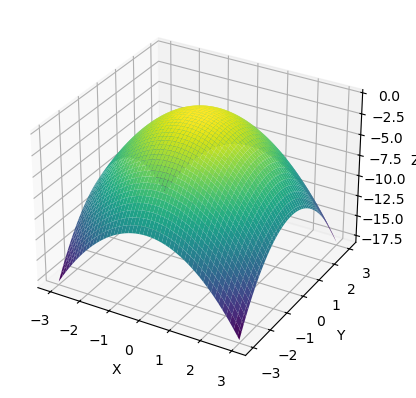

In [1]:
# 绘图
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def fun(x, y):
    return -(x**2 + y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
z = fun(x, y)
surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [2]:
# 求函数的梯度
import tensorflow as tf

def func(x):
    return x**2 + 2*x - 1

x = tf.constant(2.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = func(x)
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [3]:
# 求函数二阶梯度
import tensorflow as tf

x = tf.Variable(2.0, trainable=True)
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x**2 + 2*x - 1
    order_1 = tape2.gradient(y, x)
order_2 = tape1.gradient(order_1, x)

print("在x = 2处的一阶梯度为：", order_1.numpy())
print("在x = 2处的二阶梯度为：", order_2.numpy())

在x = 2处的一阶梯度为： 6.0
在x = 2处的二阶梯度为： 2.0


In [4]:
# 三元函数的梯度
import tensorflow as tf

def func(x): 
    return x[0]**3 + 3 * x[0] * x[1] + x[1]**2 + x[2]**3

def gradient_test():  # 求L (=3) 元函数的梯度
    x = tf.Variable([1.0, 2.0, 3.0], dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = func(x)
    # 一阶导
    order_1 = tape.gradient(target=y, sources=x)
    
    # 因为x是一个张量列表，所以order_1也是一个张量列表
    print("多元函数x = [1.0, 2.0, 3.0]处的梯度为：", [grad.numpy() for grad in order_1])

if __name__ == "__main__":
    gradient_test()

多元函数x = [1.0, 2.0, 3.0]处的梯度为： [9.0, 7.0, 27.0]


In [5]:
# 线性回归
import numpy as np
import random
import tensorflow as tf

# 定义损失函数
def loss(y_true, y_pred):
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

# 生成训练数据
x_train_inch = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=np.float32)
y_train_price = np.array([num * 10 + 5 for num in x_train_inch], dtype=np.float32)  # y = 10x + 5

# 随机初始化待训练的参数
w1 = tf.Variable(random.random(), trainable=True, dtype=tf.float32)
w0 = tf.Variable(random.random(), trainable=True, dtype=tf.float32)

def step_gradient(real_x, real_y, learning_rate):
    with tf.GradientTape() as tape:
        # 计算模型预测
        pred_y = w1 * real_x + w0
        # 计算损失
        reg_loss = loss(real_y, pred_y)
    # 计算梯度
    w1_gradients, w0_gradients = tape.gradient(reg_loss, (w1, w0))
    # 更新权值
    w1.assign_sub(w1_gradients * learning_rate)
    w0.assign_sub(w0_gradients * learning_rate)

if __name__ == '__main__':
    learning_rate = 0.01
    num_iterations = 1000

    for _ in range(num_iterations):
        step_gradient(tf.convert_to_tensor(x_train_inch), tf.convert_to_tensor(y_train_price), learning_rate)

    print(f'拟合得到的模型近似为: y = {w1.numpy()}x + {w0.numpy()}')
    # 预测
    wheat = 0.9
    price = w1 * wheat + w0
    print('price = {0:.2f}.'.format(price.numpy()))

拟合得到的模型近似为: y = 10.00578498840332x + 4.955857276916504
price = 13.96.
